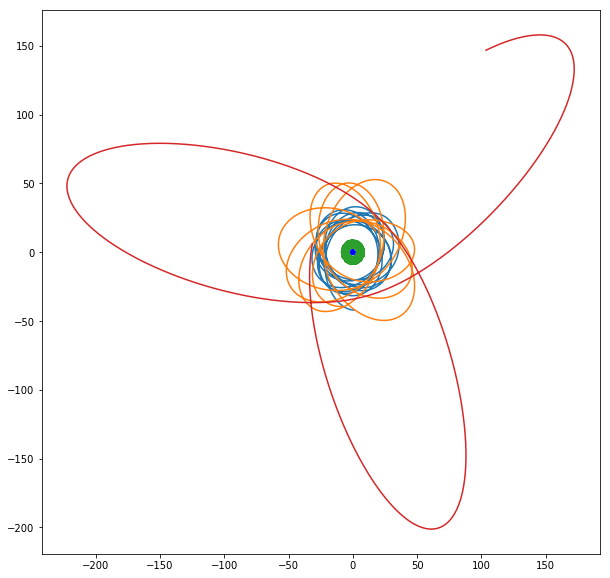

In [13]:
%matplotlib inline

import numpy
import numpy.linalg
import matplotlib.pyplot as plt
import random

G = 50.0# гравитационная постоянная
N = 4

collision_distance = 3.0  # всё-таки это не точки
model_delta_t = 0.01
time_to_model = 10

class MaterialPoint:
    """Материальная точка, движущаяся по двумерной плоскости"""
    
    def __init__(self, mass: 'float', position: 'numpy.array', velocity: 'numpy.array'):
        # Аннотации типов по желанию, но могут помочь IDE и компилятору, когда таковые имеются
        self.mass = mass
        self.position = position
        self.velocity = velocity
    
    @staticmethod
    def gravity_dencity(dist: 'float')-> 'float':
        if dist > collision_distance:
            return G / dist
        else:
            return -G / dist ** 3 # будем считать, что отскакивают точки друг от друга резко, но стараться не допускать этого
    
    def force_induced_by_other(self, other: 'MaterialPoint')-> 'numpy.array':
        delta_p = other.position - self.position
        distance = numpy.linalg.norm(delta_p)  # Евклидова норма (по теореме Пифагора)
        force_direction = delta_p / distance
        force = force_direction * self.mass * other.mass * MaterialPoint.gravity_dencity(distance)
        return force
    
    def advance(self):
        # print(self.position)
        self.position += self.velocity * model_delta_t

    def apply_force(self, force: 'numpy.array'):
        # print(force)
        self.velocity += force * model_delta_t / self.mass


centrum = MaterialPoint(500.0, numpy.array([0.0, 0.0]), numpy.array([0.0, 0.0]))
point = [] # MaterialPoint(10.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 15.0]))
for i in range(N):
    x = random.uniform(-40, 40)
    y = random.uniform(-40, 40)
    point.append(MaterialPoint(10.0, numpy.array([x, y]), numpy.array([-y*10, x*10])))
#point.append(MaterialPoint(10.0, numpy.array([50.0, 0.0]), numpy.array([0.0, 15.0])))
#point.append(MaterialPoint(10.0, numpy.array([50.0, 40.0]), numpy.array([-7.0, 7.0])))

def model_step():
    for i in range(N):
        point[i].apply_force(point[i].force_induced_by_other(centrum))
        for k in range(N):
            if k != i:
                 point[i].apply_force(point[i].force_induced_by_other(point[k]))
        point[i].advance()
  

  
steps = int(time_to_model / model_delta_t)   
S = [[[],[]] for i in range(steps)]


for stepn in range(steps):
    for i in range(N):
        S[i][0].append(point[i].position[0])
        S[i][1].append(point[i].position[1])
    model_step()
   

c = plt.Circle((0, 0), 2, color='b')
fig = plt.figure()
fig.set_size_inches(10, 10, forward = True)
ax = fig.add_subplot(1, 1, 1)
ax.add_patch(c)

for i in range(N):
    
    plt.plot(S[i][0],S[i][1])

plt.show()


In [9]:
%ed 7


IPython will make a temporary file named: C:\Users\HomePC\AppData\Local\Temp\ipython_edit_td61w64a\ipython_edit_msvblnb7.py
